In [127]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import math as mth

In [128]:
# load edge data for SLC
edges = pd.read_csv('/Users/samtaimourzadeh/Downloads/edges_test.csv')

In [129]:
edges

,Unnamed: 0,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v
0,0,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83891...",residential,NaN,0,NaN,42.499,25 mph,Melbourne Street,False,10149523,NaN,NaN,NaN,2937569283,83694460
1,1,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83917...",residential,NaN,0,NaN,79.588,25 mph,Melbourne Street,False,10149523,NaN,NaN,NaN,2937569283,83591592
2,2,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83888...",residential,NaN,0,NaN,77.156,NaN,NaN,False,321407916,NaN,NaN,NaN,2937569283,3281566893
3,3,NaN,NaN,"LINESTRING (-111.9258576 40.7368384, -111.9258...",residential,NaN,0,NaN,37.955,NaN,1200 West,False,10148837,NaN,NaN,NaN,83705866,83545910
4,4,NaN,NaN,"LINESTRING (-111.9258576 40.7368384, -111.9268...",residential,NaN,0,NaN,86.968,NaN,Andrew Avenue,False,10150211,NaN,NaN,NaN,83705866,83704070
5,5,NaN,NaN,"LINESTRING (-111.9258576 40.7368384, -111.9258...",residential,NaN,0,NaN,287.805,NaN,"['1200 West', 'Harris Avenue']",False,"[10150851, 10148837]",NaN,NaN,NaN,83705866,83704071
6,6,NaN,NaN,"LINESTRING (-111.9196977 40.7714198, -111.9187...",secondary,NaN,0,2,107.991,30 mph,North Temple,True,"[152426097, 388578867]",NaN,NaN,NaN,1651982351,1652425171
7,7,NaN,NaN,"LINESTRING (-111.9196977 40.7714198, -111.9196...",tertiary,NaN,0,4,20.440,NaN,1000 West,False,282793234,NaN,NaN,NaN,1651982351,83563485
8,8,NaN,NaN,"LINESTRING (-111.9196977 40.7714198, -111.9196...",residential,NaN,0,NaN,110.841,NaN,1000 West,False,"[282793235, 282793236]",NaN,NaN,NaN,1651982351,83563483
9,9,NaN,NaN,"LINESTRING (-111.9427906 40.7781445, -111.9427...",residential,NaN,0,NaN,81.172,NaN,Pamela Way,False,10141280,NaN,NaN,NaN,83656724,83656726


In [277]:
edges['geometry'][0]

'LINESTRING (-111.8389197 40.708906, -111.8389171 40.7085238)'

In [131]:
# number of edges
nedges = edges.geometry.size
nedges

13536

In [132]:
# test location
location = (40.758220, -111.899599)

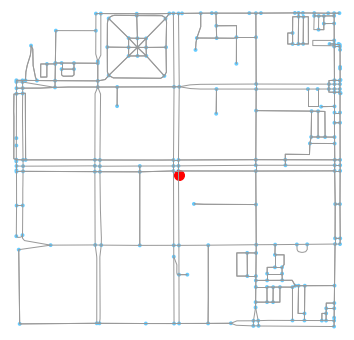

In [133]:
graph = ox.graph_from_point(location, distance=500)
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.show()

In [279]:
edges['geometry'][5][12:-1]

'-111.9258576 40.7368384, -111.9258371 40.7353401, -111.925833 40.7350413, -111.926877 40.7350377'

In [135]:
edges['geometry'][2][12:-1].split(",")

['-111.8389197 40.708906', ' -111.8388822 40.7095993']

In [136]:
# get long / lat for edges
df = pd.DataFrame()
for i in range(0, nedges):
    edge_string = edges['geometry'][i][12:-1].split(",")
    tmp = []
    for j in range(0, len(edge_string)):
        edge_array = np.fromstring(edge_string[j], sep=' ')
        edge_array = np.flip(edge_array)
        tmp.append(edge_array)
        tmp2 = np.concatenate(tmp)
        dftmp = pd.DataFrame(tmp2)
    df = pd.concat([df, dftmp], axis=1, ignore_index=True)

In [138]:
# dataFrame of long / lat points on edges
df;

In [78]:
location

(40.75822, -111.899599)

In [160]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13526,13527,13528,13529,13530,13531,13532,13533,13534,13535
0,40.708906,40.708906,40.708906,40.736838,40.736838,40.736838,40.771420,40.771420,40.771420,40.778145,...,40.735228,40.735228,40.735228,40.735217,40.735217,40.735217,40.735252,40.735252,40.735252,40.713024
1,-111.838920,-111.838920,-111.838920,-111.925858,-111.925858,-111.925858,-111.919698,-111.919698,-111.919698,-111.942791,...,-111.919130,-111.919130,-111.919130,-111.921643,-111.921643,-111.921643,-111.922517,-111.922517,-111.922517,-111.820325
2,40.708524,40.709595,40.709599,40.737180,40.736841,40.735340,40.771421,40.771504,40.771333,40.778875,...,40.735217,40.733515,40.736629,40.735228,40.734950,40.735220,40.735220,40.735431,40.734781,40.713034
3,-111.838917,-111.839174,-111.838882,-111.925851,-111.926890,-111.925837,-111.918717,-111.919698,-111.919695,-111.942791,...,-111.921643,-111.919138,-111.919132,-111.919130,-111.921640,-111.922387,-111.922387,-111.922429,-111.922777,-111.821098
4,NaN,NaN,NaN,NaN,NaN,40.735041,40.771422,40.771542,40.770423,NaN,...,NaN,NaN,NaN,NaN,NaN,40.735252,40.735217,40.735982,40.734324,40.713106


In [173]:
c = (abs(df[1::2] - location[1]).reset_index(drop=True) + abs(df[0::2] - location[0]).reset_index(drop=True)).min() 
c.idxmin()

6722

In [161]:
edges['geometry'][6722]

'LINESTRING (-111.8996043 40.7562732, -111.8996053 40.7564503, -111.8996193 40.7583231, -111.8996204 40.7584631)'

In [ ]:
edges.iloc[6,:]

In [30]:
location0 = (40.758989, -111.899707) # current location
location1 = (40.758215, -111.899674) # last step
location2 = (40.757491, -111.899707) # 2 steps ago


In [162]:
tmp = np.array(df.iloc[:,6722].dropna())
ytmp = tmp[::2]
xtmp = tmp[1::2]

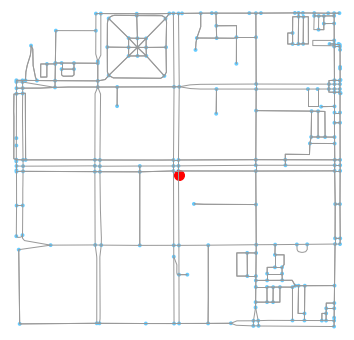

In [58]:
# Get graph data around input coordinate
graph = ox.graph_from_point(location, distance=500)
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp)
plt.show()

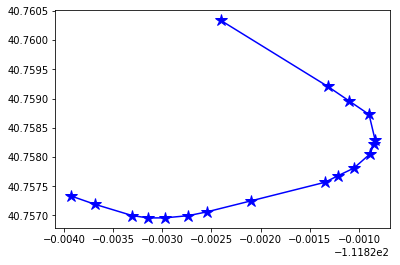

In [73]:
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()

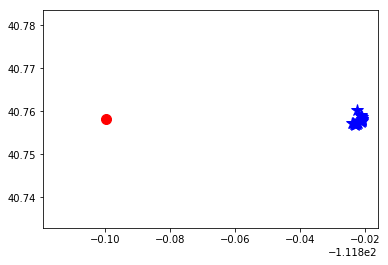

In [74]:
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()

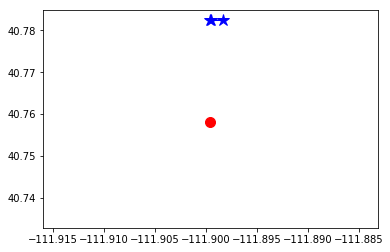

In [76]:
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()

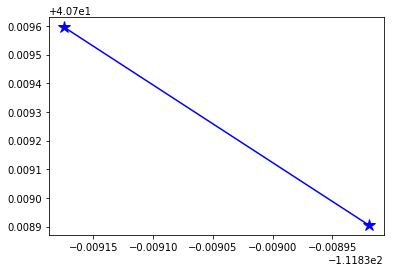

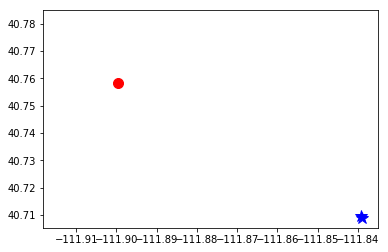

In [94]:
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()

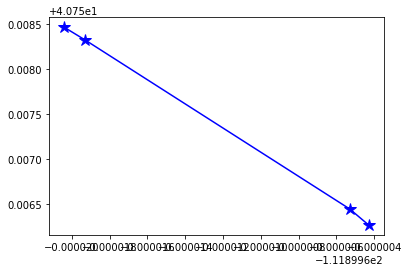

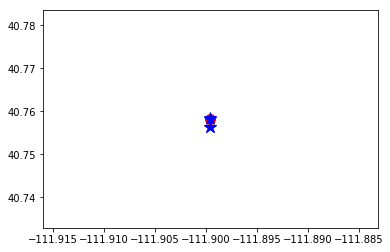

In [163]:
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*b', markersize=13)
plt.show()

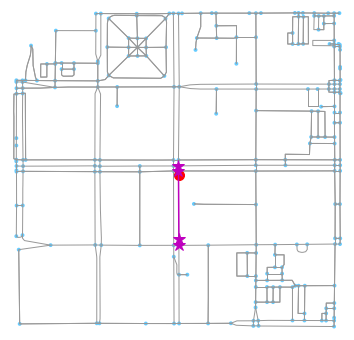

In [164]:
# Get graph data around input coordinate
graph = ox.graph_from_point(location, distance=500)
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*m', markersize=13)
plt.show()

In [169]:
edges.iloc[6722,:]

Unnamed: 0                                                 6722
access                                                      NaN
bridge                                                      NaN
geometry      LINESTRING (-111.8996043 40.7562732, -111.8996...
highway                                               secondary
junction                                                    NaN
key                                                           0
lanes                                                         3
length                                                   243.51
maxspeed                                                    NaN
name                                                   300 West
oneway                                                     True
osmid                                                 198549589
ref                                                         NaN
service                                                     NaN
tunnel                                  

In [210]:
# test multiple points

locs = []
location = (40.758220, -111.899599)
locs.append(location)
location = (40.765704, -111.888269)
locs.append(location)
location = (40.747351, -111.926717)
locs.append(location)
location = (40.748418, -111.928599)
locs.append(location)
location = (40.774607, -111.893425)
locs.append(location)
location = (40.725318, -111.889544)
locs.append(location)
location = (40.727202, -111.882558)
locs.append(location)

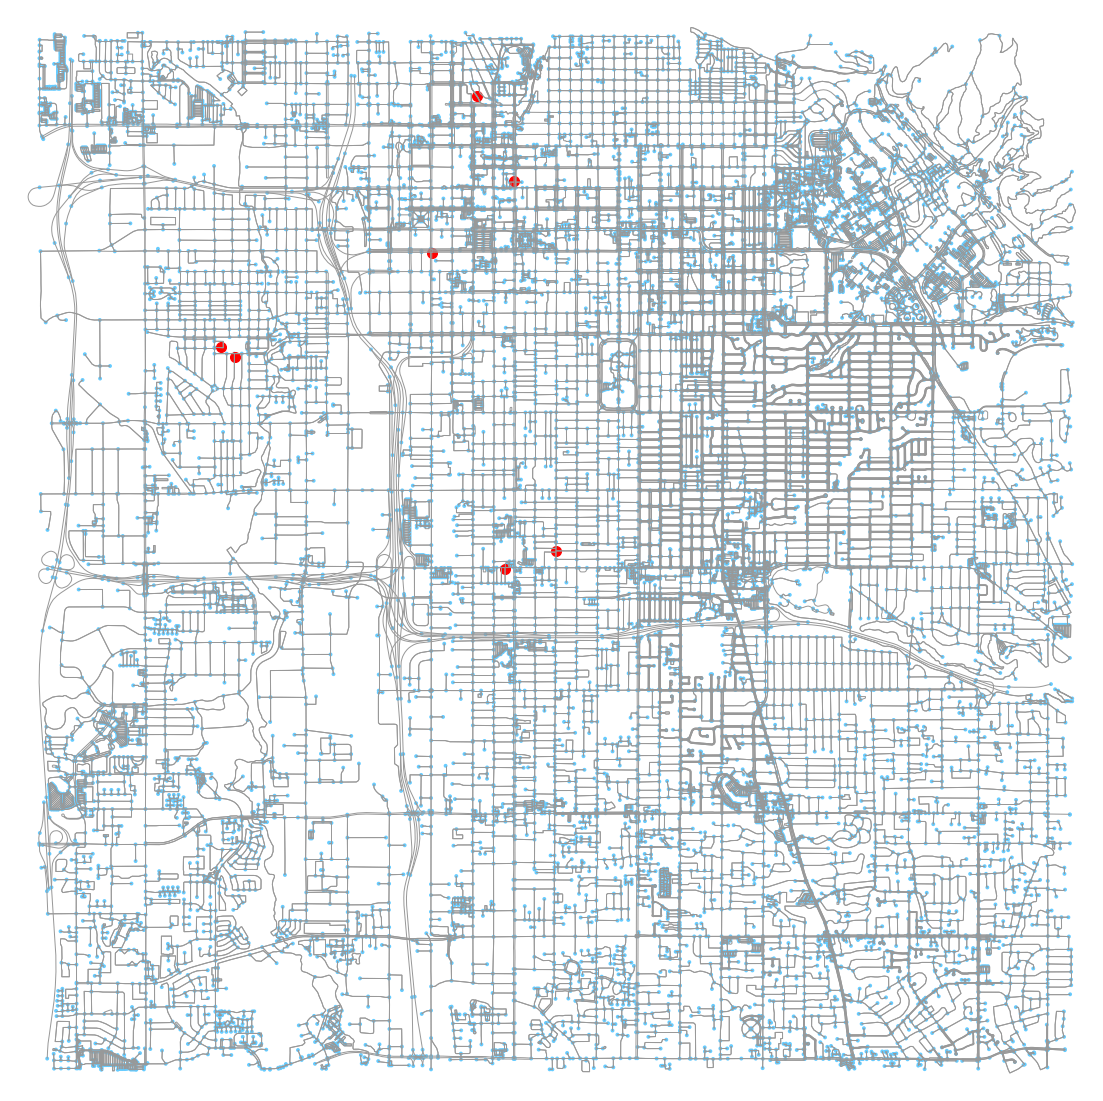

In [214]:
# Get graph data around input coordinate
graph = ox.graph_from_point(location, distance=6000)
fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

In [265]:
index = np.zeros(len(locs))
for i in range(0,len(locs)):
    c = (abs(df[1::2] - locs[i][1]).reset_index(drop=True) + abs(df[0::2] - locs[i][0]).reset_index(drop=True)).min() 
    index[i] = c.idxmin()

In [266]:
index

array([ 6722., 11509.,  6083.,   737.,  1977.,   811.,   786.])

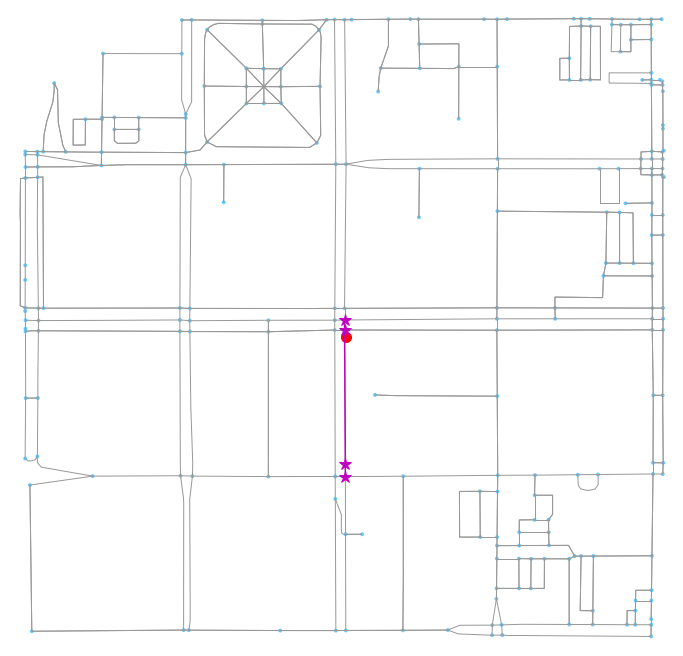

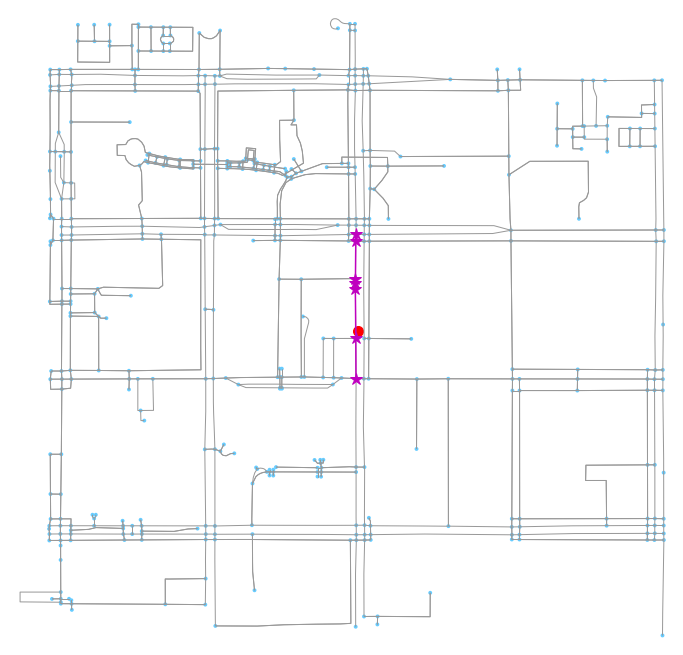

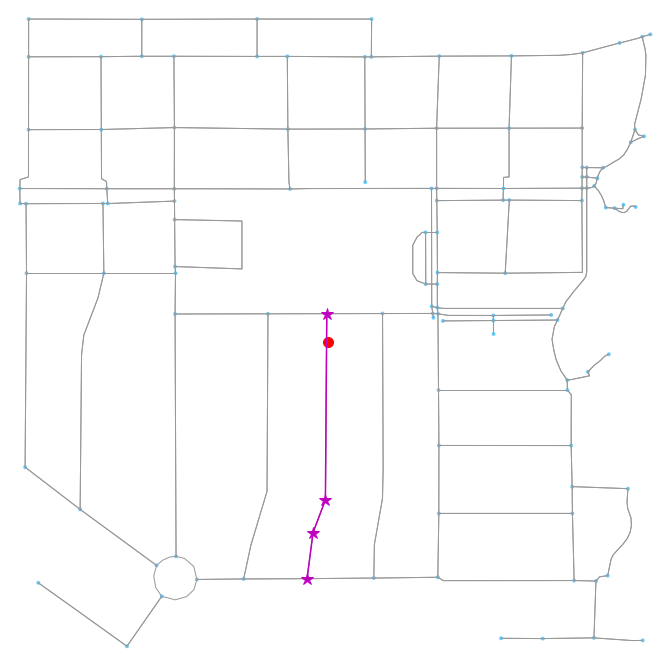

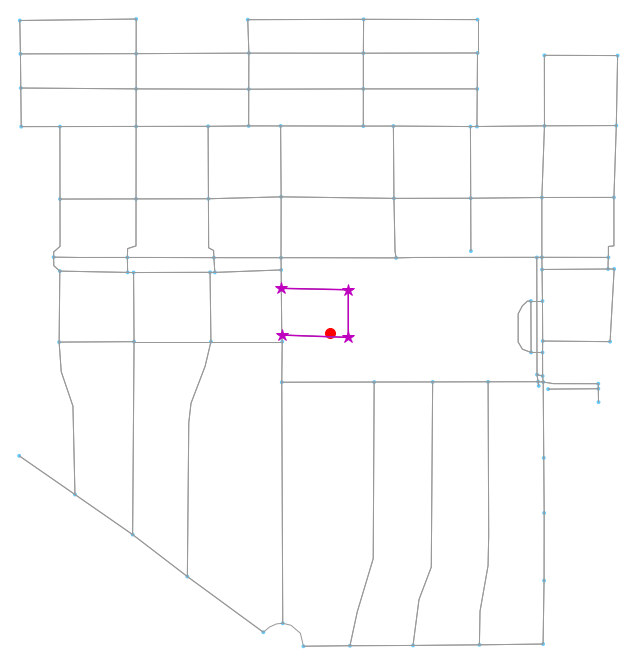

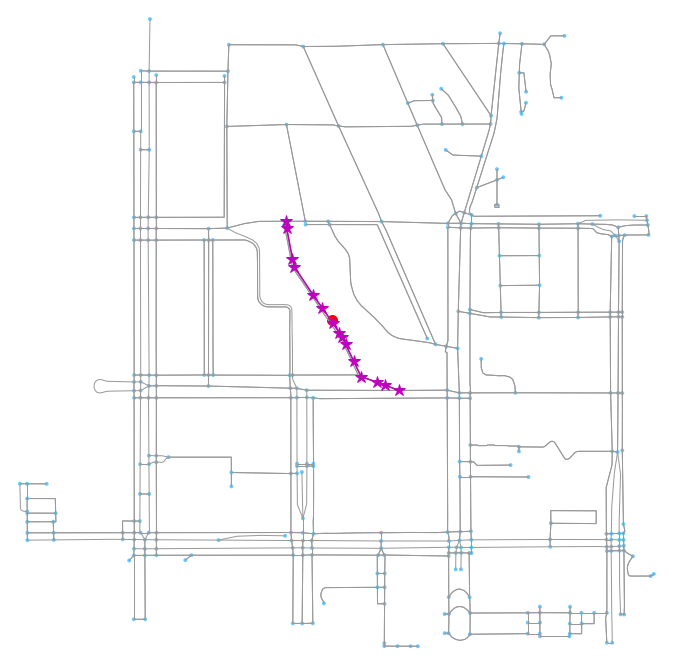

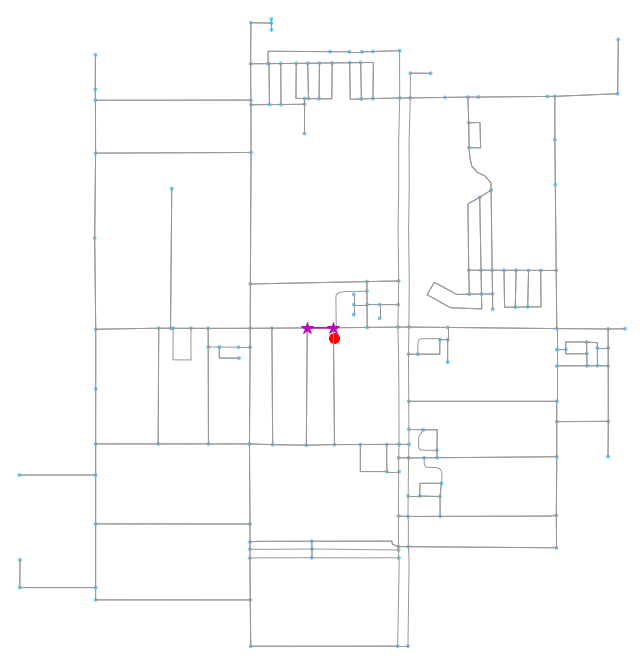

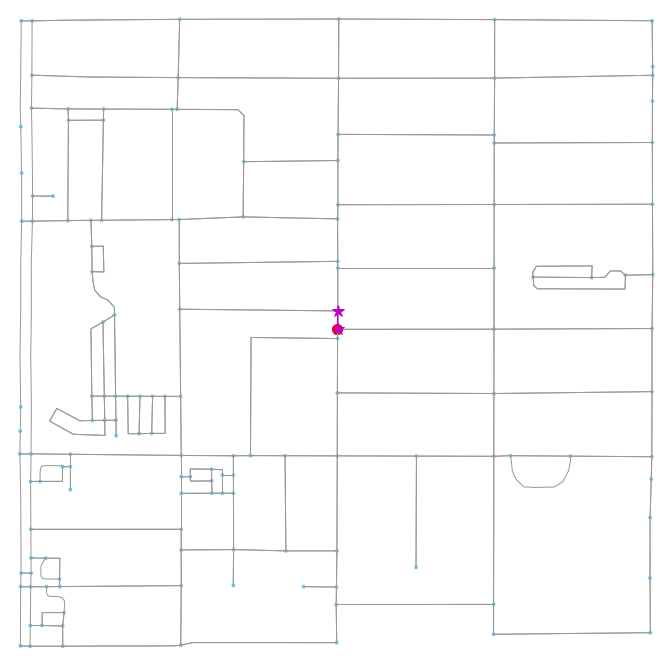

In [217]:
for i in range(0,len(locs)):

    tmp = np.array(df.iloc[:,int(index[i])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]

    # Get graph data around input coordinate
    graph = ox.graph_from_point(locs[i], distance=500)
    fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
    plt.show()

In [218]:
edges.iloc[811,:]

Unnamed: 0                                                  811
access                                                      NaN
bridge                                                      NaN
geometry      LINESTRING (-111.8895497 40.7254565, -111.8900...
highway                                               secondary
junction                                                    NaN
key                                                           0
lanes                                                         4
length                                                    40.93
maxspeed                                                    NaN
name                                                 2100 South
oneway                                                    False
osmid                                                 105738913
ref                                                      UT 201
service                                                     NaN
tunnel                                  

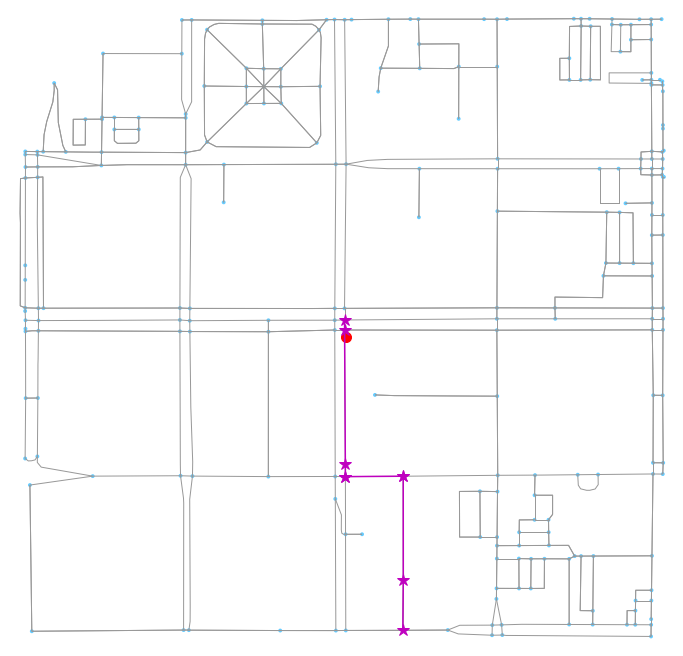

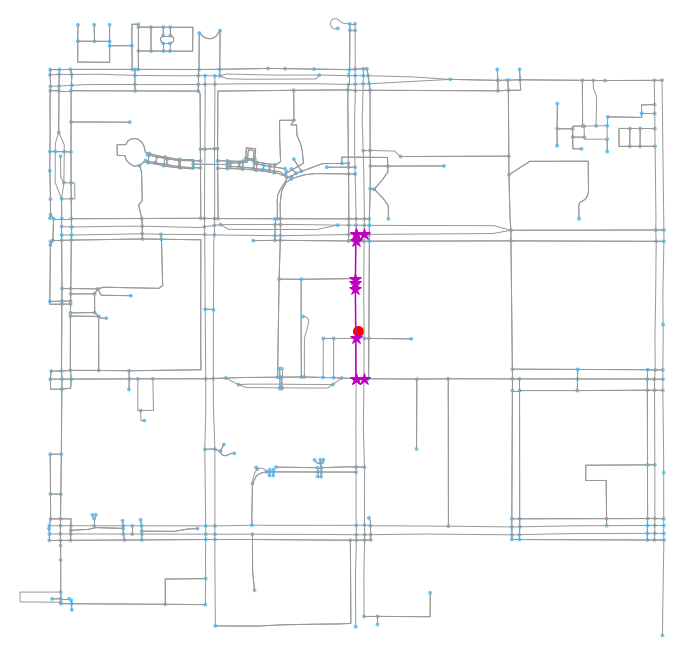

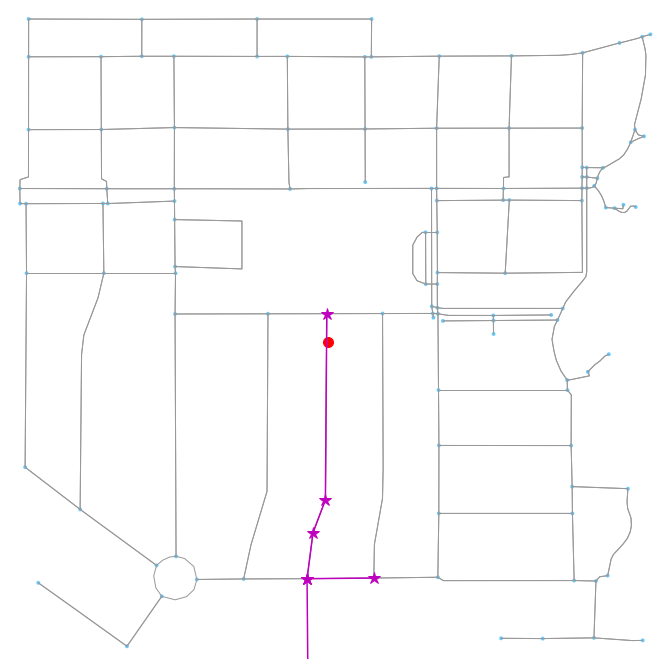

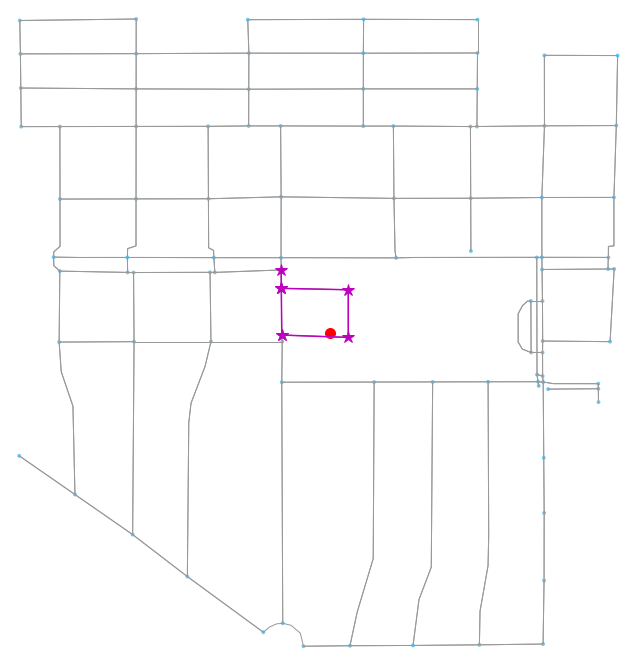

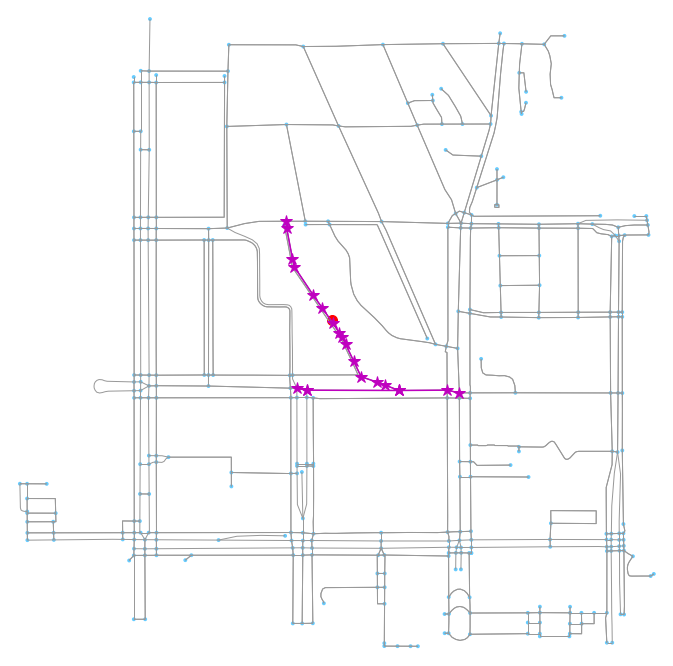

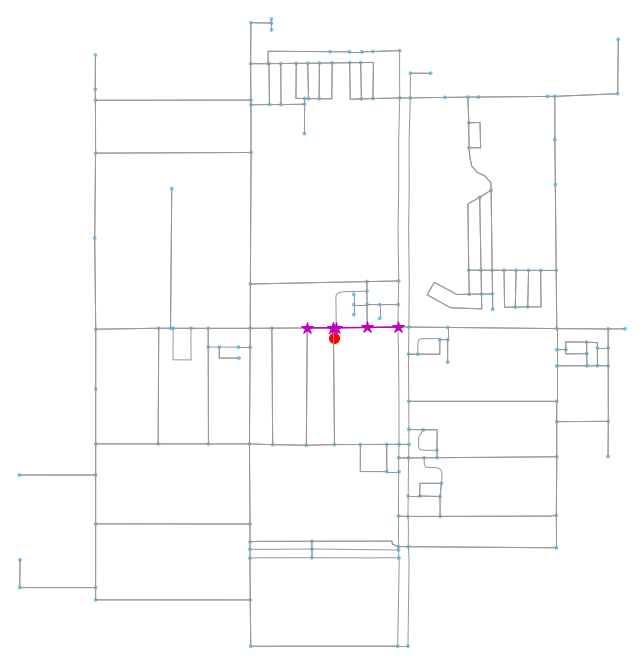

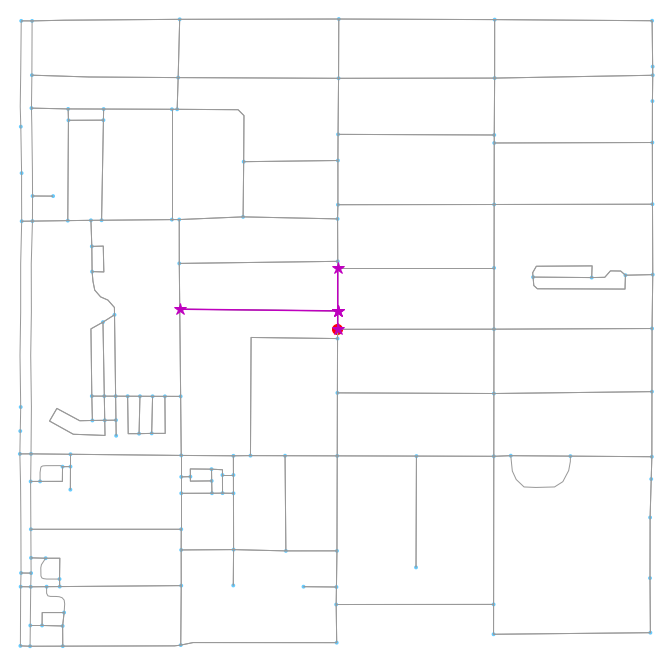

In [267]:
for i in range(0,len(locs)):

    tmp = np.array(df.iloc[:,int(index[i])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]

    # Get graph data around input coordinate
    graph = ox.graph_from_point(locs[i], distance=500)
    fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
    nj = 4
    for j in range(0, nj):
        tmp = np.array(df.iloc[:,int(j - np.ceil(nj/2)) + int(index[i])].dropna())
        ytmp = tmp[::2]
        xtmp = tmp[1::2]
        plt.plot(xtmp,ytmp, '-*m', markersize=13)
    plt.show()

In [228]:
# Let's try to optimize in whole column at once...

In [269]:
index = np.zeros((len(locs), 10))
i=5
c = (abs(df[1::2] - locs[i][1]).reset_index(drop=True) + abs(df[0::2] - locs[i][0]).reset_index(drop=True)).min() 
index[i,0] = c.idxmin()
dftmp = df.drop(index[i,0], axis=1)

for j in range(1,10):
    c = (abs(dftmp[1::2] - locs[i][1]).reset_index(drop=True) + abs(dftmp[0::2] - locs[i][0]).reset_index(drop=True)).min() 
    index[i,j] = c.idxmin()
    dftmp = dftmp.drop(index[i,j], axis=1)


In [270]:
index

array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [  811.,   812.,   958., 11585.,   959., 13205.,  9882., 13206.,
         7029., 11583.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]])

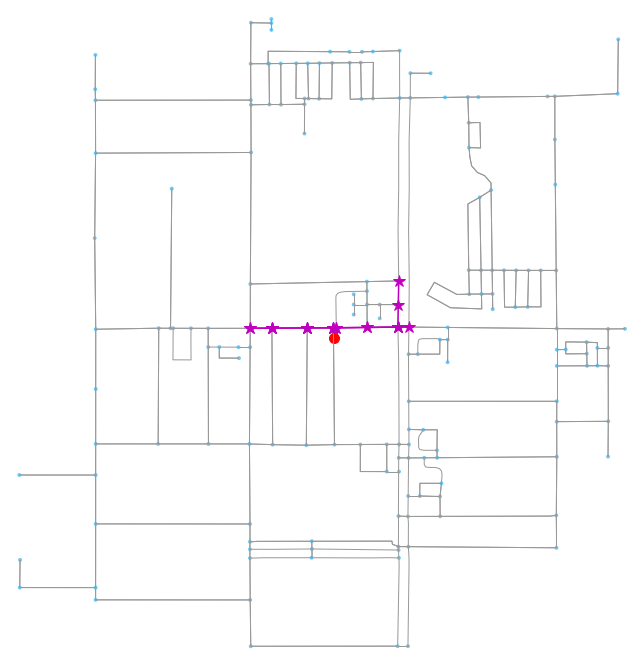

In [271]:
i=5
# Get graph data around input coordinate
graph = ox.graph_from_point(locs[i], distance=500)
fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
#nj = 10
for j in range(0, len(index[0,:])):
    tmp = np.array(df.iloc[:,int(index[i, j])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
plt.show()

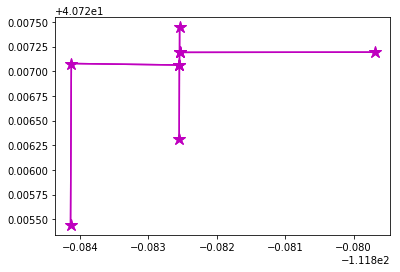

In [262]:
for j in range(0, len(index[0,:])):
    tmp = np.array(df.iloc[:,int(index[i, j])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
plt.show()